In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import time

In [29]:
df = pd.read_csv("/home/abhishek/Desktop/24144001_CSOC_IG/prerequisites/housing.csv")
df.dropna(inplace=True)

In [30]:
mappr = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}
df['ocean_proximity'] = df['ocean_proximity'].map(mappr)

In [31]:
X = df[["longitude", "latitude", "housing_median_age", "total_rooms",
        "total_bedrooms", "population", "households", "median_income", "ocean_proximity"]].values
y = df["median_house_value"].values


In [32]:
with open("split_indices.pkl", "rb") as f:
    train_idx, test_idx = pickle.load(f)
X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]


In [33]:
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
X_train_norm = (X_train - means) / stds
X_test_norm = (X_test - means) / stds

In [34]:
start_time = time.time()
model = LinearRegression()
model.fit(X_train_norm, y_train)
end_time = time.time()
print(f"fitting time for sklearn implementation is: {end_time - start_time:.4f} seconds")

fitting time for sklearn implementation is: 0.0026 seconds


In [35]:
y_pred_test = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)


In [36]:
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse_np(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_np(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

In [37]:
print("for train (sklearn implementation):")
print("MAE:", mae(y_train, y_pred_train))
print("RMSE:", rmse(y_train, y_pred_train))
print("R2:", r2(y_train, y_pred_train))
print()

for train (sklearn implementation):
MAE: 51014.07378882303
RMSE: 69915.16668571079
R2: 0.6328572949621494



In [38]:
print("for test (sklearn implementation):")
print("MAE:", mae(y_test, y_pred_test))
print("RMSE:", rmse(y_test, y_pred_test))
print("R2:", r2(y_test, y_pred_test))


for test (sklearn implementation):
MAE: 50341.33695161742
RMSE: 67985.21412580046
R2: 0.65402245820622


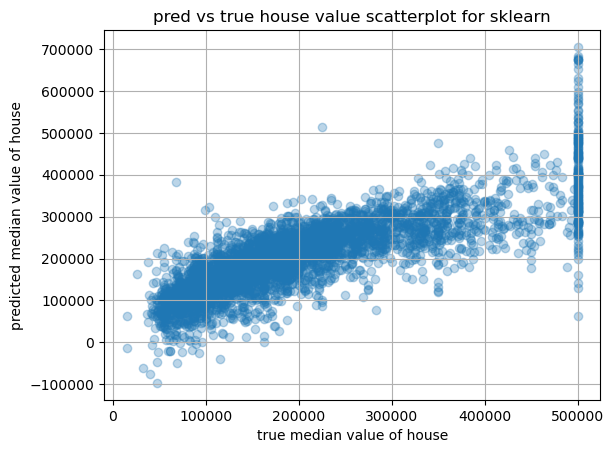

In [40]:
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel("true median value of house")
plt.ylabel("predicted median value of house")
plt.title("pred vs true house value scatterplot for sklearn")
plt.grid(True)
plt.show()